In [1]:
import finterstellar as fs

In [2]:
# 5.2

In [4]:
df = fs.fn_single(otp='OTP', symbol='COST', window='T')
print(df.tail(3))

Invalid OTP.


AttributeError: 'NoneType' object has no attribute 'tail'

In [4]:
df.columns

df["FCF"] = df["Operarting Cash Flow"] + df["Capital Expenditure"]

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

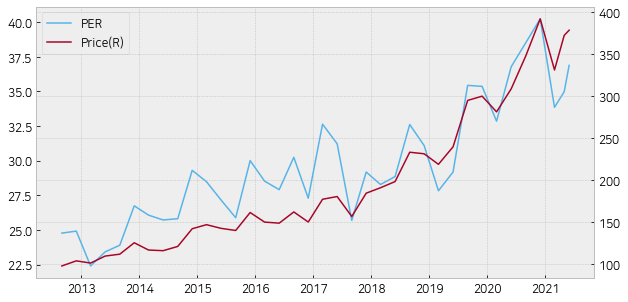

In [5]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='Price')

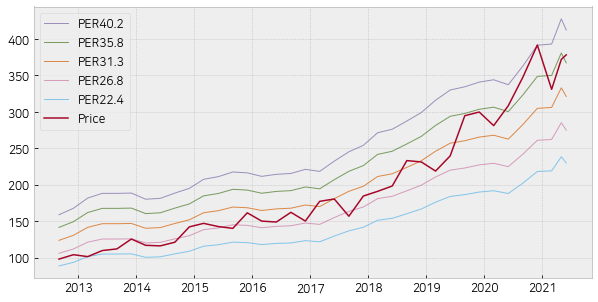

In [6]:
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

In [8]:
df = fs.fn_consolidated(otp='OTP', term='2020Q3', vol=100000, study='Y')
print(df.head(3))

2020Q3... For Study. Freezed at the end of July 2021. OK
          term  Revenue     COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                      
A       2020Q3 5,223.00 2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3 9,330.00 8,043.00      1,287.00   213.00            -23.00   
AAIC    2020Q3    64.77     0.00         64.77    12.56             11.16   

        Net Income   EPS   EBITDA   EBIT  ...  Financing Cash Flow  Price  \
symbol                                    ...                               
A           691.00  2.26 1,105.00 797.00  ...                49.00 100.94   
AA         -469.00 -2.53   643.00 -23.00  ...               484.00  11.63   
AAIC        -54.80 -1.52    62.76  52.21  ...            -3,220.76   2.84   

        Price_M1  Price_M2  Price_M3                                     name  \
symbol                                                                          
A        

In [9]:
df.columns

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume'],
      dtype='object')

In [10]:
df['PER'] = df['Price'] / df['EPS']
df['PER']

symbol
A       44.66
AA      -4.60
AAIC    -1.87
AAL     -0.89
AAOI    -2.88
        ...  
ZUMZ    11.40
ZUO    -14.99
ZVO     -7.55
ZYME   -10.02
ZYXI    56.29
Name: PER, Length: 3106, dtype: float64

In [11]:
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')   # trade term to fiscal terms
terms

Index(['2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'], dtype='object')

In [ ]:
data_2019Q4 = fs.fn_consolidated(otp='OTP', term='2019Q4')
data_2020Q1 = fs.fn_consolidated(otp='OTP', term='2020Q1')
data_2020Q2 = fs.fn_consolidated(otp='OTP', term='2020Q2')
data_2020Q3 = fs.fn_consolidated(otp='OTP', term='2020Q3')
data_2020Q4 = fs.fn_consolidated(otp='OTP', term='2020Q4')

In [12]:
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [13]:
print(data['2020Q3'])

          term   Revenue      COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                        
A       2020Q3  5,223.00  2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3  9,330.00  8,043.00      1,287.00   213.00            -23.00   
AAIC    2020Q3     64.77      0.00         64.77    12.56             11.16   
AAL     2020Q3 24,623.00 27,542.00     -2,919.00   919.00         -7,177.00   
AAOI    2020Q3    230.96    180.35         50.60    55.17            -47.73   
...        ...       ...       ...           ...      ...               ...   
ZUMZ    2020Q3    980.94    643.45        337.49   259.06             78.43   
ZUO     2020Q3    291.10    133.82        157.28   164.34            -82.66   
ZVO     2020Q3    400.26     52.45        347.81    90.39            -25.78   
ZYME    2020Q3     25.15    175.65       -150.50    73.18           -223.68   
ZYXI    2020Q3     68.68     14.58         54.10    

In [14]:
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']

In [15]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
signal['2019Q4']

['DAC',
 'FENG',
 'SWN',
 'PAM',
 'CRON',
 'KODK',
 'NRG',
 'FINV',
 'QD',
 'REGI',
 'BPT',
 'YRD',
 'STLA',
 'LGND',
 'XIN',
 'SND',
 'STAR',
 'LXRX',
 'BBAR',
 'ARLP',
 'CNF',
 'HCC',
 'HSC',
 'PBI',
 'MUR',
 'QFIN',
 'CEPU',
 'VNO',
 'ATH',
 'TA']

In [16]:
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 67.40%
Accumulated return: 67.40%
Investment period: 1.0yrs
Sharpe ratio: 1.52
MDD: -12.03%


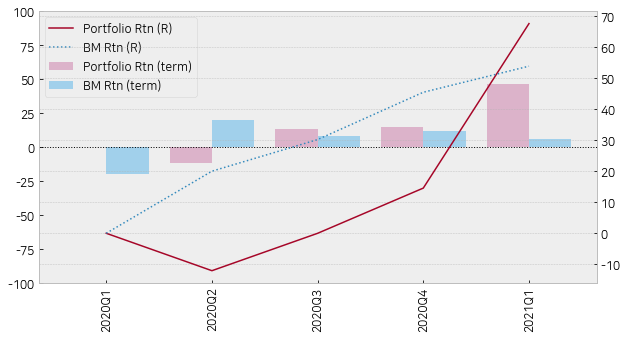

In [17]:
fs.draw_return(df)

In [18]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 67.40%
Accumulated return: 67.40%
Investment period: 1.0yrs
Sharpe ratio: 1.52
MDD: -12.03%


In [ ]:
# 5.3 PBR

In [ ]:
# import finterstellar as fs

In [19]:
df = fs.fn_single(otp='OTP', symbol='JBLU', window='T')

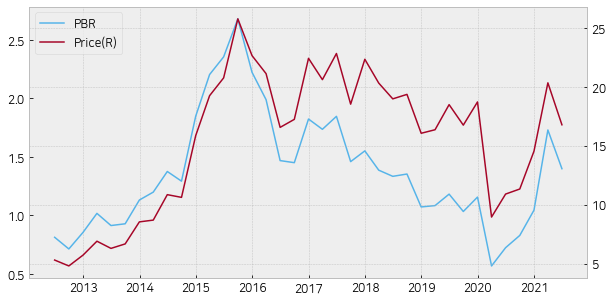

In [20]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['PBR'] = df['Price'] / df['BPS']
fs.draw_chart(df, left='PBR', right='Price')

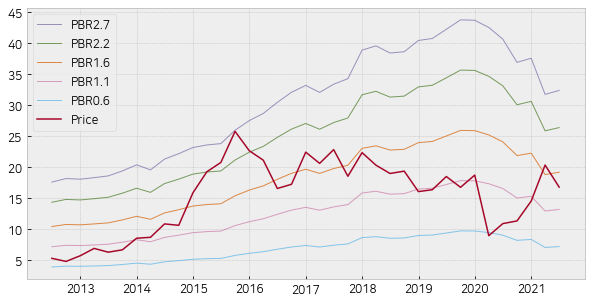

In [21]:
fs.draw_price_multiple_band(df, multiple='PBR', acct='BPS')

In [22]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 212.25%
Accumulated return: 212.25%
Investment period: 1.0yrs
Sharpe ratio: 3.96
MDD: -0.17%


In [23]:
signal['2020Q3']

['PAGP',
 'LXU',
 'HNRG',
 'REI',
 'CRESY',
 'GNW',
 'AR',
 'NBR',
 'PEI',
 'BHF',
 'FET',
 'CDR',
 'CPE',
 'APTS',
 'CIG',
 'GLOP',
 'WPG',
 'SND',
 'DAC',
 'YPF',
 'AWX',
 'SALM',
 'DBRG',
 'IRCP',
 'QD',
 'NTZ',
 'NR',
 'GASS',
 'KEP',
 'BTU']

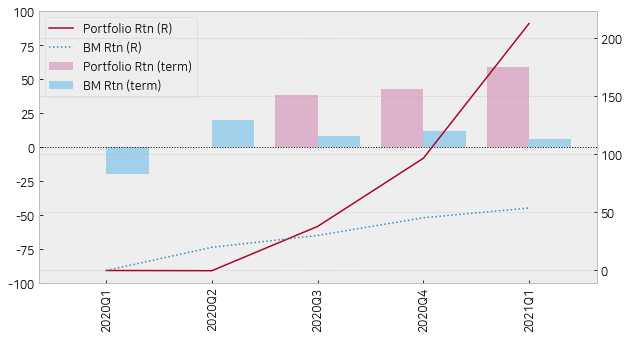

In [24]:
fs.draw_return(df)

In [25]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 307.82%
Accumulated return: 307.82%
Investment period: 1.0yrs
Sharpe ratio: 4.53
MDD: 0.00%


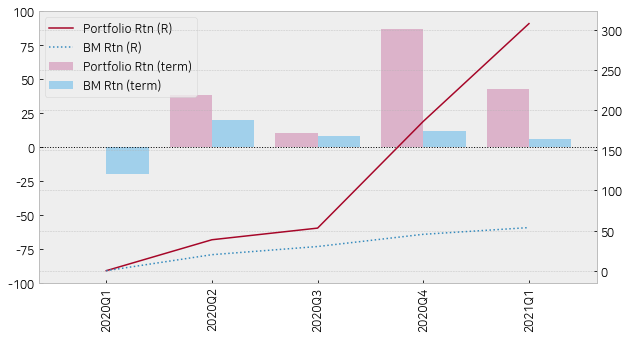

In [26]:
fs.draw_return(df)

In [ ]:
# 5.4 PSR

In [27]:
df = fs.fn_single(otp='OTP', symbol='WMT', window='T')

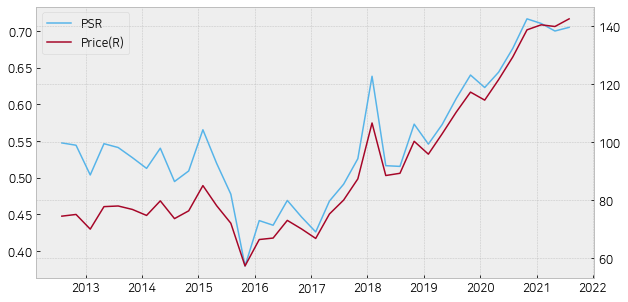

In [28]:
df['SPS'] = df['Revenue'] / df['Shares']
df['PSR'] = df['Price'] / df['SPS']
fs.draw_chart(df, left='PSR', right='Price')

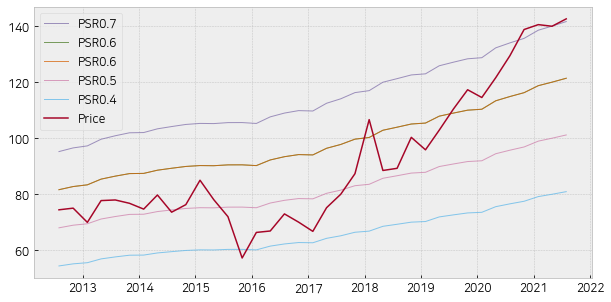

In [29]:
fs.draw_price_multiple_band(df, multiple='PSR', acct='SPS')

In [30]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 235.36%
Accumulated return: 235.36%
Investment period: 1.0yrs
Sharpe ratio: 4.98
MDD: 0.00%


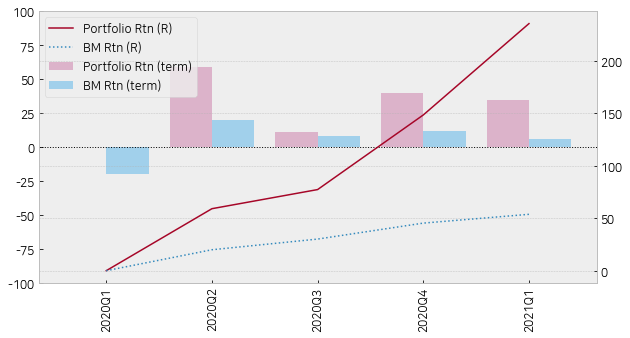

In [31]:
fs.draw_return(df)

In [37]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 28.17%
Accumulated return: 1098.66%
Investment period: 10.0yrs
Sharpe ratio: 3.28
MDD: -34.43%


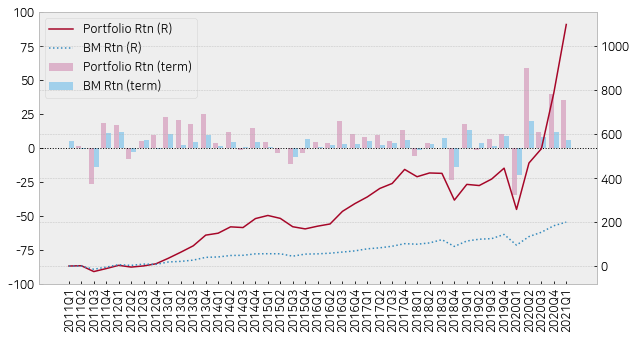

In [38]:
fs.draw_return(df)

In [ ]:
# 5.5 PCR

In [39]:
df = fs.fn_single(otp='OTP', symbol='MCD', window='T')

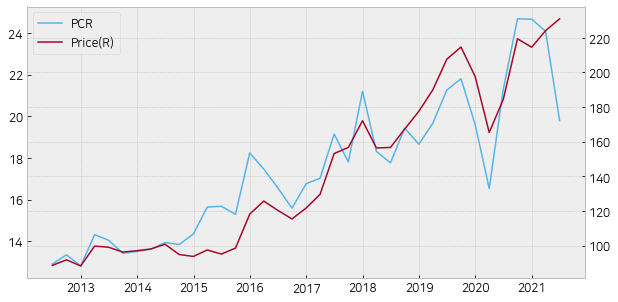

In [40]:
df['OCF'] = df['Net Income'] + df['Depreciation']
df['CFPS'] = df['OCF'] / df['Shares']
df['PCR'] = df['Price'] / df['CFPS']
fs.draw_chart(df, left='PCR', right='Price')

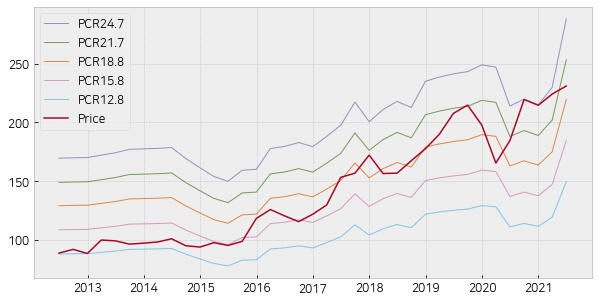

In [41]:
fs.draw_price_multiple_band(df, multiple='PCR', acct='CFPS')

In [42]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 11.58%
Accumulated return: 199.39%
Investment period: 10.0yrs
Sharpe ratio: 0.51
MDD: -53.66%


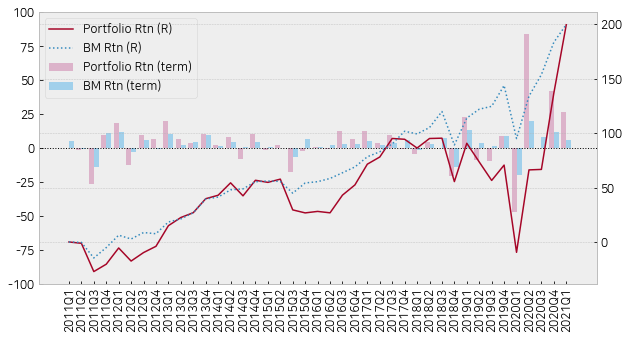

In [43]:
fs.draw_return(df)

In [45]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=10, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 23.10%
Accumulated return: 700.56%
Investment period: 10.0yrs
Sharpe ratio: 1.49
MDD: -32.08%


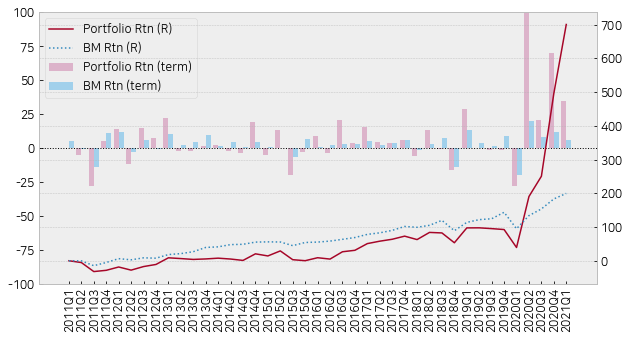

In [46]:
fs.draw_return(df)

In [ ]:
# PER, PBR

In [47]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 10.07%
Accumulated return: 161.35%
Investment period: 10.0yrs
Sharpe ratio: 0.56
MDD: -52.23%


In [48]:
s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 23.56%
Accumulated return: 731.08%
Investment period: 10.0yrs
Sharpe ratio: 1.83
MDD: -39.86%


In [ ]:
# 5.6 Combine signal

In [62]:
t = '2020Q3'
data = fs.fn_consolidated(otp='OTP', term=t, vol=0)
data['PER'] = data['Price_M3'] / data['EPS']
data['PBR'] = data['Price_M3'] / (data['Shareholders Equity']/data['Shares'])
s1 = fs.fn_filter(data, by='PER', floor=1, cap=10, n=10, asc=True)
s2 = fs.fn_filter(data, by='PBR', floor=.1, cap=1, n=10, asc=True)

2020Q3...OK


In [63]:
print(s1)

        PER
symbol     
YJ     1.05
NNA    1.10
VHC    1.25
LYFT   1.34
UIS    1.35
JOB    1.49
CRESY  1.55
MX     1.57
SND    1.58
VTOL   1.60


In [64]:
print(s2)

        PBR
symbol     
REI    0.10
ACOR   0.11
LTRPA  0.12
BORR   0.12
RIG    0.12
GNW    0.13
TYHT   0.14
GLOP   0.14
PAGP   0.14
NNA    0.15


In [65]:
print(fs.combine_signal(s1, s2, how='and'))

        PER  PBR
symbol          
NNA    1.10 0.15


In [66]:
print(fs.combine_signal(s1, s2, how='or'))

        PER  PBR
symbol          
ACOR    nan 0.11
BORR    nan 0.12
CRESY  1.55  nan
GLOP    nan 0.14
GNW     nan 0.13
JOB    1.49  nan
LTRPA   nan 0.12
LYFT   1.34  nan
MX     1.57  nan
NNA    1.10 0.15
PAGP    nan 0.14
REI     nan 0.10
RIG     nan 0.12
SND    1.58  nan
TYHT    nan 0.14
UIS    1.35  nan
VHC    1.25  nan
VTOL   1.60  nan
YJ     1.05  nan


In [67]:
s1 = fs.fn_score(data, by='PER', method='absolute', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='absolute', floor=.1, cap=1, asc=True)

In [68]:
print(s1)

         PER  Score
symbol             
YJ      1.05  99.50
NNA     1.10  98.80
VHC     1.25  97.20
LYFT    1.34  96.20
UIS     1.35  96.10
...      ...    ...
GSBD    9.96   0.50
HSBC    9.97   0.40
EBTC    9.98   0.20
ACI     9.99   0.10
CRWS   10.00   0.00

[335 rows x 2 columns]


In [69]:
print(s2)

        PBR  Score
symbol            
REI    0.10  99.60
ACOR   0.11  99.40
LTRPA  0.12  98.30
BORR   0.12  97.80
RIG    0.12  97.20
...     ...    ...
FCF    1.00   0.20
TEVA   1.00   0.20
CRS    1.00   0.10
GWB    1.00   0.10
EBSB   1.00   0.00

[864 rows x 2 columns]


In [70]:
print(fs.combine_score(s1, s2, n=10))

        Score  Score_   Sum
symbol                     
NNA     49.40   47.35 96.75
CRESY   46.95   45.05 92.00
SND     46.75   42.40 89.15
TNK     46.35   37.65 84.00
TRMD    45.00   33.20 78.20
STNG    37.20   39.60 76.80
PVL     38.00   37.20 75.20
LIVE    44.75   28.60 73.35
JOB     47.25   24.70 71.95
BMA     46.40   25.40 71.80


In [71]:
s1 = fs.fn_score(data, by='PER', method='relative', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='relative', floor=.1, cap=1, asc=True)

In [72]:
print(s1)

         PER  Score
symbol             
YJ      1.05 100.00
NNA     1.10  99.70
VHC     1.25  99.40
LYFT    1.34  99.10
UIS     1.35  98.80
...      ...    ...
GSBD    9.96   1.50
HSBC    9.97   1.20
EBTC    9.98   0.90
ACI     9.99   0.60
CRWS   10.00   0.30

[335 rows x 2 columns]


In [73]:
print(s2)

        PBR  Score
symbol            
REI    0.10 100.00
ACOR   0.11  99.90
LTRPA  0.12  99.80
BORR   0.12  99.70
RIG    0.12  99.50
...     ...    ...
FCF    1.00   0.60
TEVA   1.00   0.50
CRS    1.00   0.30
GWB    1.00   0.20
EBSB   1.00   0.10

[864 rows x 2 columns]


In [74]:
print(fs.combine_score(s1, s2, n=10))

        Score  Score_   Sum
symbol                     
NNA     49.85   49.50 99.35
CRESY   49.10   48.80 97.90
SND     48.80   47.80 96.60
TNK     48.05   45.85 93.90
TRMD    47.30   43.50 90.80
STNG    43.45   46.60 90.05
PVL     43.75   45.60 89.35
LIVE    47.15   40.10 87.25
AEL     44.50   42.75 87.25
TRMT    41.95   45.25 87.20


In [ ]:
# 5.7 가치투자 4대장 콤보

In [ ]:
# pip install finterstellar

In [ ]:
import finterstellar as fs

In [75]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
terms

Index(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
       '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [76]:
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)   

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [77]:
print(data['2020Q3'])

          term   Revenue      COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                        
A       2020Q3  5,223.00  2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3  9,330.00  8,043.00      1,287.00   213.00            -23.00   
AAIC    2020Q3     64.77      0.00         64.77    12.56             11.16   
AAL     2020Q3 24,623.00 27,542.00     -2,919.00   919.00         -7,177.00   
AAOI    2020Q3    230.96    180.35         50.60    55.17            -47.73   
...        ...       ...       ...           ...      ...               ...   
ZUMZ    2020Q3    980.94    643.45        337.49   259.06             78.43   
ZUO     2020Q3    291.10    133.82        157.28   164.34            -82.66   
ZVO     2020Q3    400.26     52.45        347.81    90.39            -25.78   
ZYME    2020Q3     25.15    175.65       -150.50    73.18           -223.68   
ZYXI    2020Q3     68.68     14.58         54.10    

In [78]:
for t in terms:    
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )

In [79]:
print(data['2020Q4'].sort_values(by='Market Cap', ascending=False).head())

          term    Revenue       COGS  Gross Profit      SG&A  \
symbol                                                         
AAPL    2020Q4 294,135.00 180,068.00    114,067.00 20,350.00   
MSFT    2020Q4 153,284.00  48,510.00    104,774.00 24,693.00   
AMZN    2020Q4 386,064.00 233,307.00    152,757.00 87,193.00   
GOOG    2020Q4 182,527.00  84,732.00     97,795.00 28,998.00   
GOOGL   2020Q4 182,527.00  84,732.00     97,795.00 28,998.00   

        Operating Income  Net Income   EPS    EBITDA      EBIT  ...  \
symbol                                                          ...   
AAPL           74,253.00   63,930.00  3.75 85,159.00 74,253.00  ...   
MSFT           60,155.00   51,310.00  6.78 72,183.00 60,155.00  ...   
AMZN           22,899.00   21,331.00 42.64 48,150.00 22,899.00  ...   
GOOG           41,224.00   40,269.00 59.15 54,921.00 41,224.00  ...   
GOOGL          41,224.00   40,269.00 59.15 54,921.00 41,224.00  ...   

                        name      name_kr            

In [80]:
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
for t in terms:  
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)

In [81]:
s6 = {}
for t in terms:      
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])

In [82]:
s = {}
signal = {}
for t in terms:      
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)

In [83]:
print(signal['2020Q3'])

['CRESY', 'JOB', 'TNK', 'SND', 'VRS', 'STNG', 'OSG', 'ASC', 'CEPU', 'GASS', 'CXW', 'PAM', 'OPY', 'MESA', 'AP', 'QD', 'ELVT', 'IMKTA', 'CNSL', 'INSW', 'FINV', 'COWN', 'GTS', 'ORN', 'BGFV', 'CPLP', 'RYAM', 'DAC', 'DHT', 'BZH', 'TGS', 'CUBI', 'ESEA', 'VTOL', 'CLW', 'ACCO', 'BCEI', 'ONEW', 'NAT', 'ENVA', 'MX', 'VHC', 'KNOP', 'AMRX', 'LPG', 'HRTG', 'KOP', 'PVL', 'LOMA', 'RTLR']


In [84]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 10.85%
Accumulated return: 180.40%
Investment period: 10.0yrs
Sharpe ratio: 0.55
MDD: -56.15%


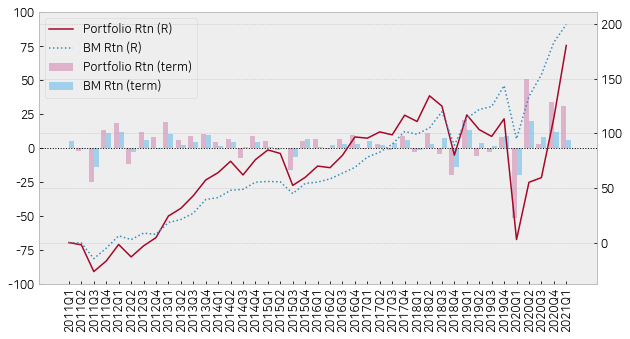

In [85]:
fs.draw_return(df)

In [86]:
# 4대장 + 소형주
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 10.85%
Accumulated return: 180.40%
Investment period: 10.0yrs
Sharpe ratio: 0.55
MDD: -56.15%


In [87]:
# 4대장 + 대형주
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=False)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.73%
Accumulated return: 74.66%
Investment period: 10.0yrs
Sharpe ratio: 0.30
MDD: -47.41%


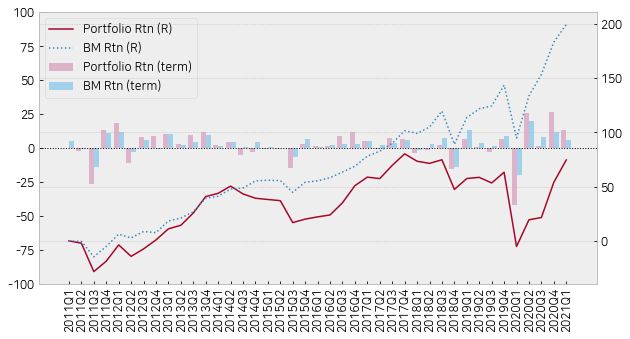

In [88]:
fs.draw_return(df)

In [ ]:
# 5.8 EV/EBITDA, EV/Sales

In [89]:
df = fs.fn_single(otp='OTP', symbol='NKE', window='T')

In [90]:
df['Market Cap'] = df['Price'] * df['Shares']    
df['EV'] = df['Market Cap'] + df['Long Term Debt'] + df['Current Debt'] - df['Cash & Equivalents']

In [91]:
df['EV/EBITDA'] = df['EV'] / df['EBITDA']

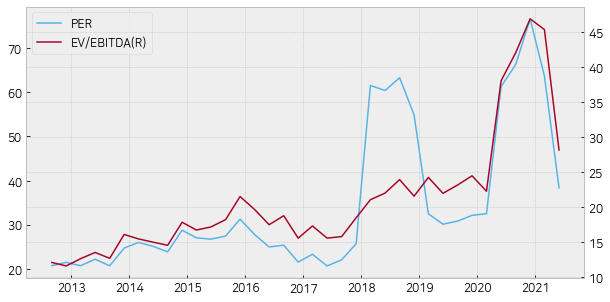

In [92]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='EV/EBITDA')

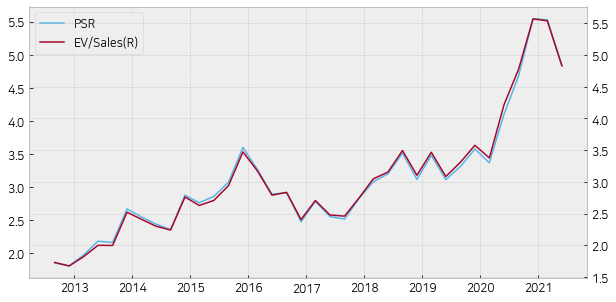

In [93]:
df['EV/Sales'] = df['EV'] / df['Revenue']
df['PSR'] = df['Price'] / (df['Revenue']/df['Shares'])
fs.draw_chart(df, left='PSR', right='EV/Sales')

In [ ]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)

In [94]:
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']

In [95]:
for t in terms:
    data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')

In [96]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)

In [97]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  

CAGR: 3.18%
Accumulated return: 36.83%
Investment period: 10.0yrs
Sharpe ratio: 0.13
MDD: -57.11%


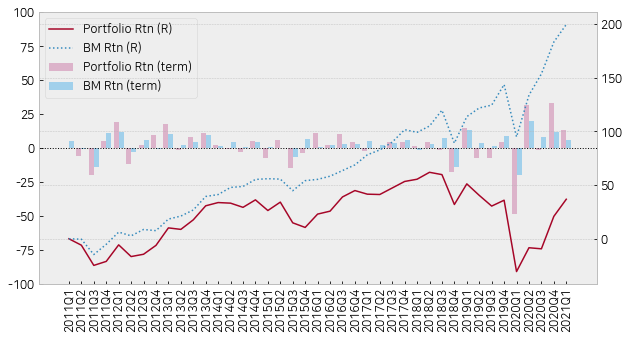

In [98]:
fs.draw_return(df)

In [99]:
# EV/EBITDA
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  

CAGR: 3.18%
Accumulated return: 36.83%
Investment period: 10.0yrs
Sharpe ratio: 0.13
MDD: -57.11%


CAGR: 27.14%
Accumulated return: 1005.44%
Investment period: 10.0yrs
Sharpe ratio: 2.89
MDD: -33.75%


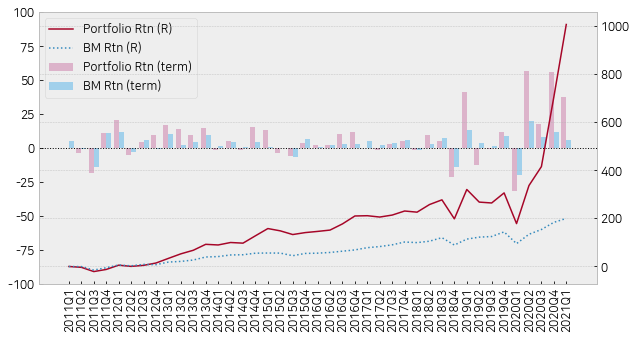

In [100]:
# EV/Sales
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/Sales'] = data[t]['EV'] / data[t]['Revenue']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['Revenue']<=0), 'EV/Sales'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/Sales', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  
fs.draw_return(df)

In [ ]:
#5.9 NCAV

In [101]:
df = fs.fn_single(otp='OTP', symbol='FB', window='T')

In [102]:
df['NCAV'] = df['Current Assets'] - df['Total Liabilities']

In [103]:
df['Market Cap'] = df['Price'] * df['Shares'] 

In [104]:
df['Safety Margin'] = df['NCAV'] - df['Market Cap']*1.5

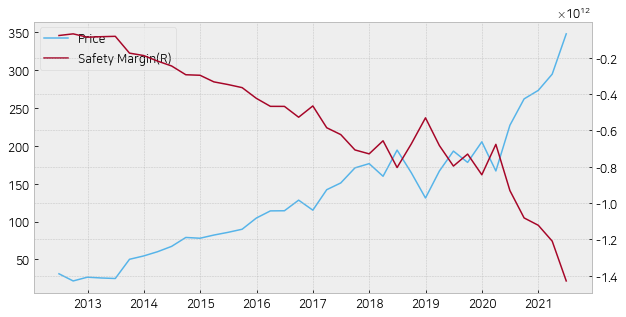

In [105]:
fs.draw_chart(df, left='Price', right='Safety Margin')

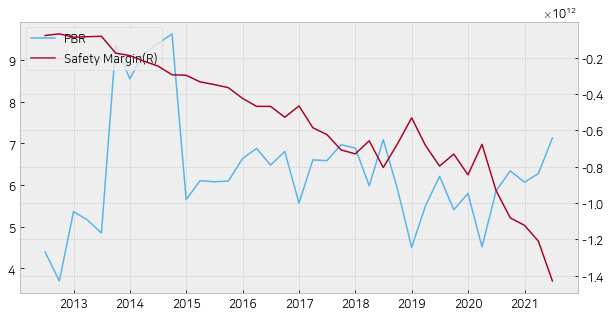

In [106]:
df['PBR'] = df['Price'] / (df['Shareholders Equity']/df['Shares'])
fs.draw_chart(df, left='PBR', right='Safety Margin')

In [121]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t, vol=10000)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [128]:
for t in terms:   
    data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities']
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
    data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap']*1.5

In [129]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

In [130]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 22.58%
Accumulated return: 667.11%
Investment period: 10.0yrs
Sharpe ratio: 2.82
MDD: -7.09%


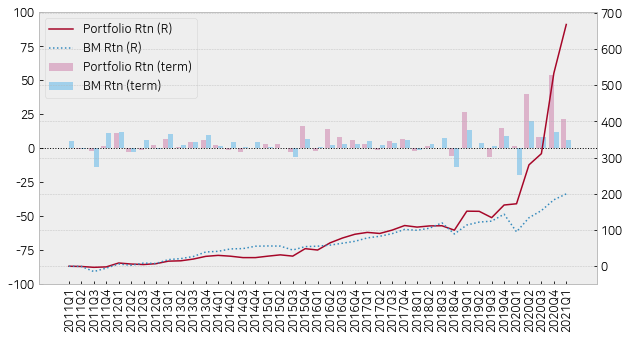

In [131]:
fs.draw_return(df)

In [132]:
for k, v in signal.items():
    print(k, len(v))

2010Q4 3
2011Q1 5
2011Q2 10
2011Q3 8
2011Q4 8
2012Q1 9
2012Q2 11
2012Q3 11
2012Q4 12
2013Q1 8
2013Q2 12
2013Q3 6
2013Q4 10
2014Q1 9
2014Q2 12
2014Q3 11
2014Q4 10
2015Q1 5
2015Q2 13
2015Q3 7
2015Q4 10
2016Q1 12
2016Q2 10
2016Q3 10
2016Q4 10
2017Q1 11
2017Q2 12
2017Q3 7
2017Q4 10
2018Q1 8
2018Q2 9
2018Q3 20
2018Q4 19
2019Q1 16
2019Q2 21
2019Q3 18
2019Q4 30
2020Q1 22
2020Q2 30
2020Q3 18
2020Q4 19


In [133]:
signal['2020Q3']

['QD',
 'IBKR',
 'XYF',
 'ACR',
 'MITT',
 'TRTX',
 'YRD',
 'SECO',
 'TYHT',
 'NVFY',
 'RCEL',
 'GURE',
 'FENG',
 'BNTC',
 'GOVX',
 'RELL',
 'LMFA',
 'MSN']

CAGR: 22.58%
Accumulated return: 667.11%
Investment period: 10.0yrs
Sharpe ratio: 2.82
MDD: -7.09%


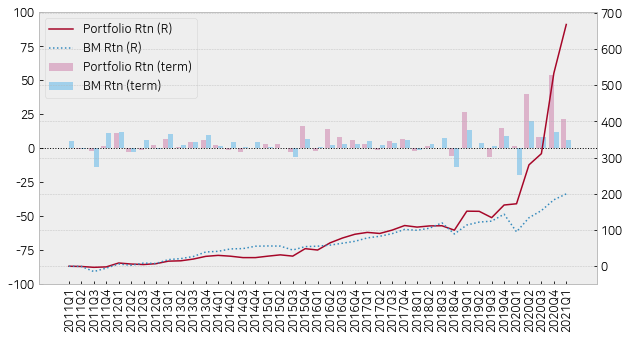

In [134]:
# Safety Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms: 
    data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities']
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
    data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap']*1.5
    s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# 5.10 PEG

In [135]:
df = fs.fn_single(otp='OTP', symbol='AAPL', window='T')

In [136]:
df['PER'] = df['Price'] / df['EPS']

In [137]:
df['EPS Growth'] = ( df['EPS'] - df['EPS'].shift(4) ) / abs(df['EPS'].shift(4)) * 100
df['PEG'] = ( df['Price'] / df['EPS'] ) / df['EPS Growth']

In [138]:
print(df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10))

            EPS  EPS Growth   PER    PEG
2019-03-31 3.00       14.96 15.84   1.06
2019-06-30 2.96        6.48 16.73   2.58
2019-09-30 2.98       -0.25 18.76 -74.84
2019-12-31 3.19        3.99 23.01   5.76
2020-03-31 3.22        7.34 19.76   2.69
2020-06-30 3.32       12.17 27.49   2.26
2020-09-30 3.29       10.05 35.25   3.51
2020-12-31 3.71       16.14 35.81   2.22
2021-03-31 4.46       38.62 27.39   0.71
2021-06-30 5.11       54.03 26.80   0.50


In [142]:
df = fs.fn_single(otp='OTP', symbol='AMZN', window='T')
df['PER'] = df['Price'] / df['EPS']
df['EPS Growth'] = ( df['EPS'] - df['EPS'].shift(4) ) / abs(df['EPS'].shift(4)) * 100
df['PEG'] = df['PER'] / df['EPS Growth']
print(df[['EPS','EPS Growth','PER', 'PEG']].tail(10))

             EPS  EPS Growth    PER   PEG
2019-03-31 24.54      201.10  72.57  0.36
2019-06-30 24.65       90.35  76.82  0.85
2019-09-30 23.05       25.75  75.31  2.92
2019-12-31 23.45       13.50  78.80  5.84
2020-03-31 21.30      -13.20  91.54 -6.93
2020-06-30 26.28        6.61 104.98 15.88
2020-09-30 34.34       48.98  91.69  1.87
2020-12-31 41.84       78.42  77.84  0.99
2021-03-31 52.55      146.71  58.88  0.40
2021-06-30 57.38      118.34  59.95  0.51


In [145]:
# PEG
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t) 
s = {}
signal = {}
for t in terms:
    t_4 = fs.quarters_before(terms, t, 4)
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['EPS Growth'] = ( data[t]['EPS'] - data[t_4]['EPS'] ) / abs(data[t_4]['EPS'])
    data[t]['PEG'] = data[t]['PER'] / data[t]['EPS Growth']
    data[t].loc[(data[t]['PER']<=0) | (data[t]['EPS Growth']<=0), 'PEG'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='PEG', floor=.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 6.32%
Accumulated return: 84.72%
Investment period: 10.0yrs
Sharpe ratio: 0.34
MDD: -46.78%


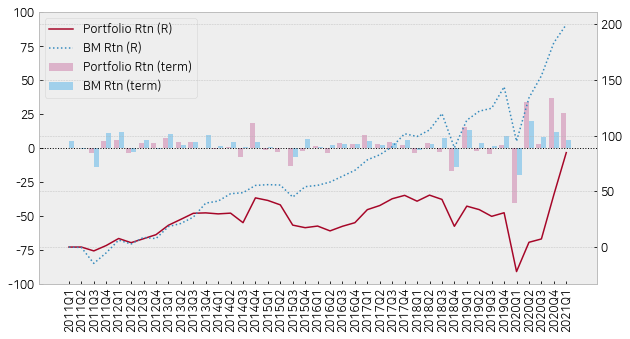

In [146]:
fs.draw_return(df)